## Mokomės dirbti su neuroniniais tinklais

- Pamėginsime paprastesnius, praeitos pamokos metu apžvelgtus modelius
- Palyginsime juos su neuroniniais tinklais
- Suprasime, kodėl mum reikia sudėtingesnių modelių

In [1]:
#Įsikeliame reikalingas bibliotekas


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import keras

import cv2

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
X, y = datasets.make_moons(n_samples=200, shuffle=True, noise=0.1, random_state=2)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle= True)

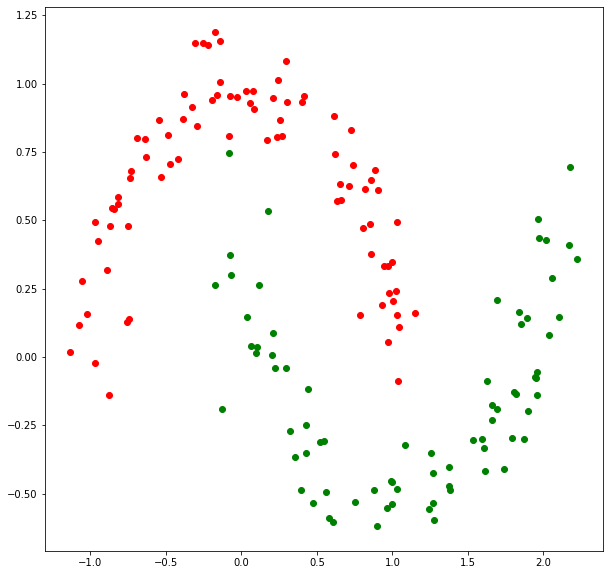

In [3]:
for i in np.unique(y_train):
    rows = np.where(y_train == i)
    if i == 0:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X_train[rows, 0], X_train[rows, 1], c = color)

In [4]:
#Išbandykime paprastą logistinę regresiją, nenaudodami jokių vidinių paslėptų sluoksnių

model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim=2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [6]:
h = model.fit(X_train, y_train,  validation_data=(X_valid, y_valid), epochs = 150 )

Epoch 1/150
5/5 [==============================] - 0s 40ms/step - loss: 0.5837 - accuracy: 0.7000 - val_loss: 0.5531 - val_accuracy: 0.7250
Epoch 2/150
5/5 [==============================] - 0s 10ms/step - loss: 0.5587 - accuracy: 0.7250 - val_loss: 0.5409 - val_accuracy: 0.7250
Epoch 3/150
5/5 [==============================] - 0s 9ms/step - loss: 0.5371 - accuracy: 0.7312 - val_loss: 0.5297 - val_accuracy: 0.7250
Epoch 4/150
5/5 [==============================] - 0s 9ms/step - loss: 0.5182 - accuracy: 0.7437 - val_loss: 0.5205 - val_accuracy: 0.7250
Epoch 5/150
5/5 [==============================] - 0s 11ms/step - loss: 0.5012 - accuracy: 0.7375 - val_loss: 0.5122 - val_accuracy: 0.7750
Epoch 6/150
5/5 [==============================] - 0s 8ms/step - loss: 0.4864 - accuracy: 0.7375 - val_loss: 0.5050 - val_accuracy: 0.7750
Epoch 7/150
5/5 [==============================] - 0s 10ms/step - loss: 0.4740 - accuracy: 0.7563 - val_loss: 0.4983 - val_accuracy: 0.7250
Epoch 8/150
5/5 [======

5/5 [==============================] - 0s 9ms/step - loss: 0.3153 - accuracy: 0.8313 - val_loss: 0.3992 - val_accuracy: 0.8500
Epoch 60/150
5/5 [==============================] - 0s 9ms/step - loss: 0.3143 - accuracy: 0.8313 - val_loss: 0.3984 - val_accuracy: 0.8500
Epoch 61/150
5/5 [==============================] - 0s 9ms/step - loss: 0.3134 - accuracy: 0.8313 - val_loss: 0.3976 - val_accuracy: 0.8500
Epoch 62/150
5/5 [==============================] - 0s 8ms/step - loss: 0.3127 - accuracy: 0.8313 - val_loss: 0.3967 - val_accuracy: 0.8500
Epoch 63/150
5/5 [==============================] - 0s 8ms/step - loss: 0.3119 - accuracy: 0.8313 - val_loss: 0.3959 - val_accuracy: 0.8500
Epoch 64/150
5/5 [==============================] - 0s 8ms/step - loss: 0.3113 - accuracy: 0.8313 - val_loss: 0.3950 - val_accuracy: 0.8500
Epoch 65/150
5/5 [==============================] - 0s 9ms/step - loss: 0.3103 - accuracy: 0.8375 - val_loss: 0.3943 - val_accuracy: 0.8500
Epoch 66/150
5/5 [===============

5/5 [==============================] - 0s 9ms/step - loss: 0.2870 - accuracy: 0.8500 - val_loss: 0.3635 - val_accuracy: 0.8500
Epoch 118/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2866 - accuracy: 0.8562 - val_loss: 0.3631 - val_accuracy: 0.8500
Epoch 119/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2866 - accuracy: 0.8562 - val_loss: 0.3626 - val_accuracy: 0.8500
Epoch 120/150
5/5 [==============================] - 0s 9ms/step - loss: 0.2861 - accuracy: 0.8562 - val_loss: 0.3622 - val_accuracy: 0.8500
Epoch 121/150
5/5 [==============================] - 0s 9ms/step - loss: 0.2859 - accuracy: 0.8562 - val_loss: 0.3618 - val_accuracy: 0.8500
Epoch 122/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2857 - accuracy: 0.8562 - val_loss: 0.3614 - val_accuracy: 0.8500
Epoch 123/150
5/5 [==============================] - 0s 9ms/step - loss: 0.2854 - accuracy: 0.8562 - val_loss: 0.3609 - val_accuracy: 0.8500
Epoch 124/150
5/5 [========

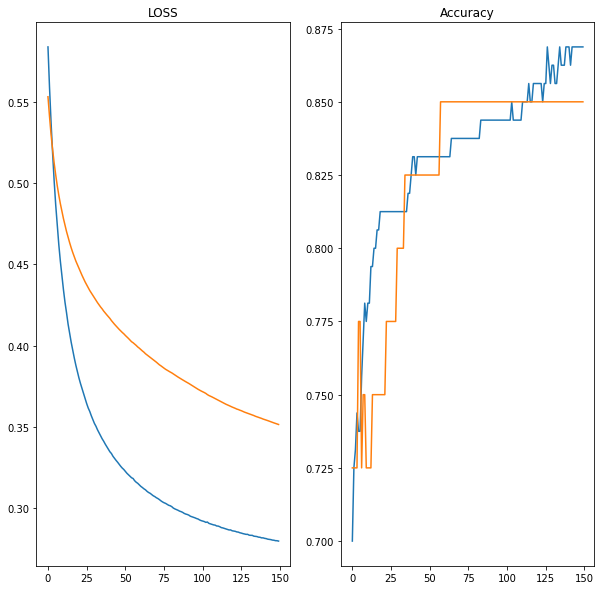

In [7]:
plt.subplot(1, 2, 1)
plt.title('LOSS')
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

In [8]:
#Atvaizduojame išmoktą decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_valid, y_valid, clf=model, legend=2)

ModuleNotFoundError: No module named 'mlxtend'

In [9]:
#Pridėkime vidinį sluoksnį, tačiau jame nenaudokime aktyvacijų

model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_dim=2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [11]:
h = model.fit(X_train, y_train,  validation_data=(X_valid, y_valid), epochs = 150 )

Epoch 1/150
5/5 [==============================] - 0s 22ms/step - loss: 0.6399 - accuracy: 0.6438 - val_loss: 0.5725 - val_accuracy: 0.8000
Epoch 2/150
5/5 [==============================] - 0s 9ms/step - loss: 0.5117 - accuracy: 0.8562 - val_loss: 0.4901 - val_accuracy: 0.8500
Epoch 3/150
5/5 [==============================] - 0s 10ms/step - loss: 0.4409 - accuracy: 0.8687 - val_loss: 0.4424 - val_accuracy: 0.8500
Epoch 4/150
5/5 [==============================] - 0s 10ms/step - loss: 0.3997 - accuracy: 0.8625 - val_loss: 0.4168 - val_accuracy: 0.8500
Epoch 5/150
5/5 [==============================] - 0s 9ms/step - loss: 0.3692 - accuracy: 0.8500 - val_loss: 0.3987 - val_accuracy: 0.8500
Epoch 6/150
5/5 [==============================] - 0s 9ms/step - loss: 0.3494 - accuracy: 0.8500 - val_loss: 0.3867 - val_accuracy: 0.8500
Epoch 7/150
5/5 [==============================] - 0s 10ms/step - loss: 0.3351 - accuracy: 0.8500 - val_loss: 0.3792 - val_accuracy: 0.8500
Epoch 8/150
5/5 [======

5/5 [==============================] - 0s 10ms/step - loss: 0.2665 - accuracy: 0.8875 - val_loss: 0.3184 - val_accuracy: 0.8500
Epoch 60/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2658 - accuracy: 0.8875 - val_loss: 0.3181 - val_accuracy: 0.8500
Epoch 61/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2675 - accuracy: 0.8875 - val_loss: 0.3166 - val_accuracy: 0.8500
Epoch 62/150
5/5 [==============================] - 0s 10ms/step - loss: 0.2649 - accuracy: 0.8875 - val_loss: 0.3165 - val_accuracy: 0.8500
Epoch 63/150
5/5 [==============================] - 0s 9ms/step - loss: 0.2656 - accuracy: 0.8875 - val_loss: 0.3168 - val_accuracy: 0.8500
Epoch 64/150
5/5 [==============================] - 0s 9ms/step - loss: 0.2668 - accuracy: 0.8875 - val_loss: 0.3183 - val_accuracy: 0.8500
Epoch 65/150
5/5 [==============================] - 0s 7ms/step - loss: 0.2659 - accuracy: 0.8875 - val_loss: 0.3169 - val_accuracy: 0.8500
Epoch 66/150
5/5 [=============

5/5 [==============================] - 0s 9ms/step - loss: 0.2645 - accuracy: 0.8875 - val_loss: 0.3128 - val_accuracy: 0.8750
Epoch 118/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2648 - accuracy: 0.8875 - val_loss: 0.3142 - val_accuracy: 0.8750
Epoch 119/150
5/5 [==============================] - 0s 9ms/step - loss: 0.2658 - accuracy: 0.8875 - val_loss: 0.3108 - val_accuracy: 0.8750
Epoch 120/150
5/5 [==============================] - 0s 9ms/step - loss: 0.2659 - accuracy: 0.8875 - val_loss: 0.3113 - val_accuracy: 0.8750
Epoch 121/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2650 - accuracy: 0.8875 - val_loss: 0.3120 - val_accuracy: 0.8750
Epoch 122/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2649 - accuracy: 0.8875 - val_loss: 0.3135 - val_accuracy: 0.8750
Epoch 123/150
5/5 [==============================] - 0s 8ms/step - loss: 0.2661 - accuracy: 0.8875 - val_loss: 0.3131 - val_accuracy: 0.8750
Epoch 124/150
5/5 [========

In [ ]:
plt.subplot(1, 2, 1)
plt.title('LOSS')
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

In [ ]:
#Atvaizduojame išmoktą decision boundary

plot_decision_regions(X_train, y_train, clf=model, legend=2)

In [ ]:
#Mėginame neuroninį tinklą, naudojame aktyvacijos funkcijas :)

model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_dim=2, activation='relu'))
model.add(keras.layers.Dense(30, input_dim=2, activation='relu'))
model.add(keras.layers.Dense(30, input_dim=2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])

In [ ]:
h = model.fit(X_train, y_train,  validation_data=(X_valid, y_valid), epochs = 150 )

In [ ]:
plt.subplot(1, 2, 1)
plt.title('LOSS')
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

In [ ]:
#Atvaizduojame išmoktą decision boundary

plot_decision_regions(X, y, clf=model, legend=2)